<a href="https://colab.research.google.com/github/ebinjomonkottakal/Computer-Vision-Projects/blob/main/Load_and_Preprocess_images_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import tensorflow as tf
import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds

In [31]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin = dataset_url,extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

In [32]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


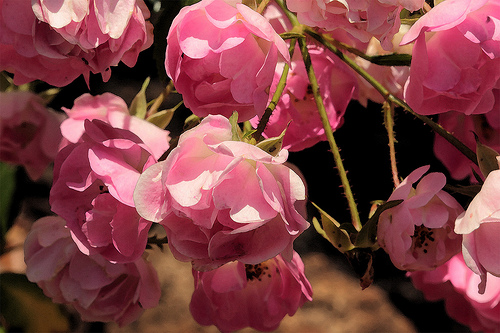

In [33]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

# Load data using keras utility

In [34]:
batch_size = 32
image_height = 180
image_width = 180

In [37]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,validation_split=0.2,subset = 'training',
    seed = 123,image_size=(image_height,image_width),
    batch_size = batch_size
  )

valid_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,validation_split = 0.2,seed = 123,subset='validation',
    image_size = (image_height,image_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [39]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


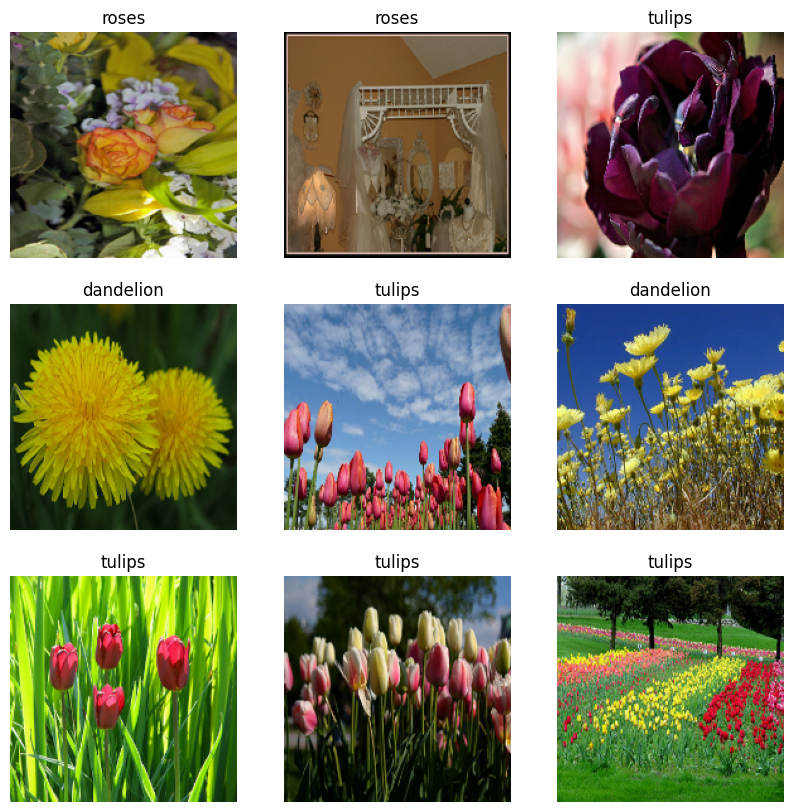

In [74]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for image,label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')


In [76]:
for image_batch,label_batch in train_ds:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(32, 180, 180, 3)
(32,)


**Standardize the data**

In [77]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

**Configure the dataset for performance**

In [78]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Train the model

In [82]:
num_classes = 5
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,3,activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

model.fit(train_ds,validation_data = valid_ds,epochs=3)

Epoch 1/3
92/92 [==============================] - 148s 2s/step - loss: 1.2925 - accuracy: 0.4159 - val_loss: 1.0890 - val_accuracy: 0.5259
Epoch 2/3
92/92 [==============================] - 138s 1s/step - loss: 1.0092 - accuracy: 0.6035 - val_loss: 0.9629 - val_accuracy: 0.6281
Epoch 3/3
92/92 [==============================] - 137s 1s/step - loss: 0.8368 - accuracy: 0.6778 - val_loss: 0.9303 - val_accuracy: 0.6335
